On a une fonction bidimensionnelle à deux variables $f(x,y)=\begin{pmatrix}f_1(x,y)\\f_2(x,y)\end{pmatrix}$ et on cherche les solutions telles que $f(x,y)=\begin{pmatrix}0\\0\end{pmatrix}$.

On va commencer par regarder la fonction pour avoir une idée des points qui sont solution. Pour cela, on trace les solutions de $f_1(x,y)=0$ et $f_2(x,y)=0$.

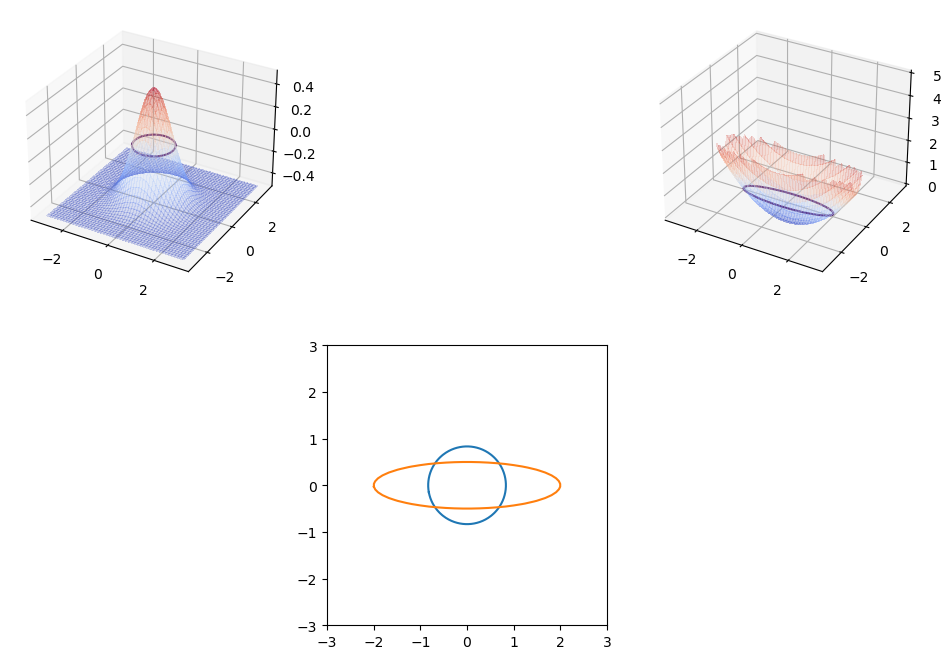

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
from mpl_toolkits import mplot3d
from matplotlib import cm


def func_start(v, a, b):
    """
    Pour une fonction on cherche à la fois à avoir la gaussienne égale à 0.5
     et la solution située sur une ellipse de demi-grand axe a (selon x) et de demi petit axe b (sur y)
    v : vecteur bidimensionnel v[0] = x, v[1] = y
    """
    x, y = v
    return np.array(
        [np.exp(-(x**2 + y**2)) - 0.5, x**2 / a**2 + y**2 / b**2 - 1]
    )


def f1(v):
    """
    Première composante de la fonction
    """
    x, y = v
    return np.exp(-(x**2 + y**2)) - 0.5


def f2(v, a, b):
    """
    Deuxièmes composante de la fonction
    """
    x, y = v
    return x**2 / a**2 + y**2 / b**2 - 1


# Programme principal
if __name__ == "__main__":
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)

    # Création de la grille de points
    xs = np.linspace(-3, 3, 100)
    ys = np.linspace(-3, 3, 100)
    grid = np.meshgrid(xs, ys, indexing="ij")
    xx, yy = grid

    # Tracé de la première composante de f
    ax1 = fig.add_subplot(gs[0, 0], projection="3d")
    zz = f1(grid)
    cont1 = ax1.contour3D(xx, yy, zz, [0.0], zorder=20)
    surf = ax1.plot_surface(
        xx,
        yy,
        zz,
        cmap=cm.coolwarm,
        linewidth=0,
        antialiased=False,
        zorder=-1,
        alpha=0.2,
    )

    # Tracé de la deuxième composante de f
    ax2 = fig.add_subplot(gs[0, 1], projection="3d")
    zz2 = f2(grid, 2, 0.5)
    zz2[zz2 > 2] = np.nan
    cont2 = ax2.contour3D(xx, yy, zz2, [0.0], zorder=20)
    surf = ax2.plot_surface(
        xx,
        yy,
        zz2,
        cmap=cm.coolwarm,
        linewidth=0,
        antialiased=False,
        zorder=-1,
        alpha=0.2,
    )
    ax2.set_zlim(0, 5)

    # superposition des deux jeux de solution
    ax3 = fig.add_subplot(gs[1, :])
    ax3.set(xlim=[-3, 3], ylim=[-3, 3], aspect=1)

    # Coordonnées des contours trouvés avec la fonction ''.contour'
    coordscont1 = np.asarray(cont1.collections[0]._segments3d[0])
    coordscont2 = np.asarray(cont2.collections[0]._segments3d[0])
    # Tracé des contours trouvés précédemment
    ax3.plot(coordscont1[:, 0], coordscont1[:, 1])
    ax3.plot(coordscont2[:, 0], coordscont2[:, 1])

    plt.show()

Les solutions sont sur l'intersection des deux courbes. En fonction du point de départ, on peut voir que les algorithmes capables de converger vers une solution ne sont pas toujours les mêmes alors que les fonctions à optimiser sont « non pathologiques ». En partant du point (0,0), on peut voir que l'algorithme de Leenberg-Marquard ne converge pas vers une solution acceptable car toutes les dérivées sont nulles dans toutes les directions pour les deux fonctions.

De plus, on peut voir qu'en fonction du point de départ et de l'algorithme, il n'y a pas toujours convergence vers la même solution parmis les 4 possibles.

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
from mpl_toolkits import mplot3d
from matplotlib import cm


def func_start(v, a, b):
    """
    Pour une fonction on cherche à la fois à avoir la gaussienne égale à 0.5
     et la solution située sur une ellipse de demi-grand axe a (selon x) et de demi petit axe b (sur y)
    v : vecteur bidimensionnel v[0] = x, v[1] = y
    """
    x, y = v
    return np.array(
        [np.exp(-(x**2 + y**2)) - 0.5, x**2 / a**2 + y**2 / b**2 - 1]
    )


def jac_func(v, a, b):
    """
    Jacobien de la fonction func_start
    """
    x, y = v
    return np.array(
        [
            [-2 * x * np.exp(-(x**2 + y**2)), -2 * y * np.exp(-(x**2 + y**2))],
            [2 * x / a**2, 2 * y / b**2],
        ]
    )


if __name__ == "__main__":
    for starting_point in [[0, 0], [-1, -1], [-0.75, -0.5], [0.68, 0.47]]:
        print("\n\npoint de départ ({},{})".format(*starting_point))
        for method_name in [
            "hybr",
            "lm",
            "broyden1",
            "broyden2",
            "anderson",
            "linearmixing",
            "diagbroyden",
            "excitingmixing",
            "krylov",
            "df-sane",
        ]:
            sol = optimize.root(
                func_start,
                starting_point,
                args=(2, 0.5),
                jac=jac_func,
                method=method_name,
            )
            if "nit" not in sol:
                sol.nit = -1
            if sol.success == True:
                print(
                    "methode {:>15} : succès {} x = {}, y={} nb iteration : {} ".format(
                        method_name, sol.success, sol.x[0], sol.x[1], sol.nit
                    )
                )
            else:
                print(
                    "methode {:>15} : succès {}  nb iteration : {} ".format(
                        method_name, sol.success, sol.nit
                    )
                )



point de départ (0,0)
methode            hybr : succès True x = 0.6875247820484458, y=0.46952833208373623 nb iteration : -1 
methode              lm : succès True x = 0.0, y=0.0 nb iteration : -1 
methode        broyden1 : succès True x = 0.6875224635549779, y=-0.4695279451162675 nb iteration : 9 
methode        broyden2 : succès True x = 0.6875232444081317, y=-0.4695285514011618 nb iteration : 10 
methode        anderson : succès True x = 0.6875314879480713, y=-0.4695270699890066 nb iteration : 10 
methode    linearmixing : succès True x = 0.6875163054988073, y=-0.4695300751217091 nb iteration : 35 
methode     diagbroyden : succès True x = 0.6875274351558719, y=-0.4695290428881743 nb iteration : 13 
methode  excitingmixing : succès True x = 0.6875240035478131, y=-0.4695297649245708 nb iteration : 30 
methode          krylov : succès False  nb iteration : 300 
methode         df-sane : succès True x = -0.6875247809040178, y=0.4695283322094961 nb iteration : 17 


point de départ (-1